In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


clinical_data = pd.read_csv('heart.csv')
#print(clinical_data.head())
#print(clinical_data.describe())
#print(clinical_data.isnull().any())

X = clinical_data.iloc[:,:13].values
y = clinical_data["target"].values
train_x,test_x,train_y, test_y = train_test_split(X,y,test_size = 0.3 , random_state = 0 )

sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

print("Finished scaling. Going to start building model")

model = Sequential()
model.add(Dense(activation = "relu", input_dim = 13, 
                     units = 8, kernel_initializer = "uniform"))
model.add(Dense(activation = "relu", units = 14, 
                     kernel_initializer = "uniform"))
model.add(Dense(activation = "sigmoid", units = 1, 
                     kernel_initializer = "uniform"))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )

model.summary()
print("Going to start training")
model.fit(train_x , train_y , batch_size = 8 , epochs = 100  )


# save model
save_path = './model.h5'
model.save(save_path)


Finished scaling. Going to start building model
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 112       
                                                                 
 dense_4 (Dense)             (None, 14)                126       
                                                                 
 dense_5 (Dense)             (None, 1)                 15        
                                                                 
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________
Going to start training
Epoch 1/100
90/90 [==============================] - 2s 6ms/step - loss: 0.6882 - accuracy: 0.6722
Epoch 2/100
90/90 [==============================] - 1s 6ms/step - loss: 0.5744 - accuracy: 0.8257
Epoch 3/100
90/90 [==============================]

In [ ]:

predicted_y = model.predict(test_x)
predicted_y = (predicted_y > 0.5)


In [ ]:
clinical_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
import seaborn as sns

Confusuion matrix [[143   2]
 [  7 156]]


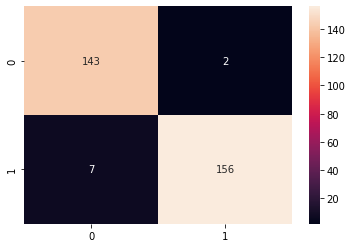

In [ ]:
cm = confusion_matrix(test_y,predicted_y) 
print("Confusuion matrix",cm)
f = sns.heatmap(cm, annot=True, fmt='d')



In [ ]:
print(classification_report(test_y,predicted_y))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       145
           1       0.99      0.96      0.97       163

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



In [ ]:
print(f"Recall Score of the classifier is: {recall_score(test_y, predicted_y)}")


Recall Score of the classifier is: 0.9570552147239264


In [ ]:
print(f"Recall Score of the classifier is: {f1_score(test_y, predicted_y)}")


Recall Score of the classifier is: 0.9719626168224299


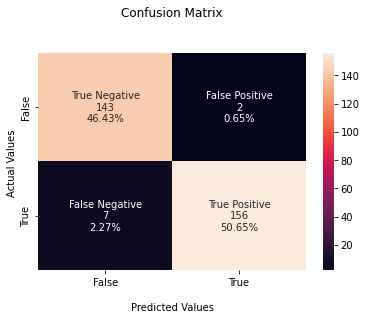

In [ ]:
name_of _groups = ['True Negative','False Positive','False Negative','True Positive']

count_of_groups = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(name_of _groups,count_of_groups,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()